# Preparations

In [ ]:
%%time
%matplotlib inline
from bamt.networks.hybrid_bn import HybridBN
from bamt.networks.discrete_bn import DiscreteBN

import bamt.preprocessors as pp

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Network based on hackaton data

In [9]:
hack = pd.read_csv(r'../data/real data/hack_processed_with_rf.csv')
cols = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
hack = hack[cols]

encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(hack)

In [15]:
bn = HybridBN(has_logit=True, use_mixture=True) # init BN
info = p.info # mapping of nodes (Dict["types": Dict[node_name: type], "signs": Dict[node_name: sign]])

bn.add_nodes(info)
# DATA PREPROCESSED MUST BE THERE
bn.add_edges(discretized_data, scoring_function=('MI',)) # use mutual information sf implemented in BAMT

bn.get_info()

,name,node_type,data_type,parents,parents_types
0,Tectonic regime,Discrete,disc,[],[]
1,Period,ConditionalLogit (LogisticRegression),disc,"[Depth, Structural setting, Lithology]","[cont, disc, disc]"
2,Lithology,ConditionalLogit (LogisticRegression),disc,"[Netpay, Structural setting]","[cont, disc]"
3,Structural setting,Logit (LogisticRegression),disc,[Permeability],[cont]
4,Gross,MixtureGaussian,cont,[Porosity],[cont]
5,Netpay,MixtureGaussian,cont,[Permeability],[cont]
6,Porosity,ConditionalMixtureGaussian,cont,[Tectonic regime],[disc]
7,Permeability,MixtureGaussian,cont,[Gross],[cont]
8,Depth,MixtureGaussian,cont,[Gross],[cont]


In [16]:
bn.fit_parameters(hack)

## Network based on vk_data

In [20]:
from utils import GraphUtils as gru
from sklearn import preprocessing as pp
from BAMT.Preprocessors import Preprocessor
from pgmpy.estimators import K2Score

vk_data = pd.read_csv(r"../data/real data/vk_data.csv")
ROWS = 50
vk_data = vk_data.iloc[:ROWS, :]

nodes_type_mixed = gru.nodes_types(vk_data)
columns = [col for col in vk_data.columns.to_list() if
           nodes_type_mixed[col] in ['disc', 'disc_num']]  # GET ONLY DISCRETE
discrete_data = vk_data[columns]

encoder = pp.LabelEncoder()
discretizer = pp.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
p = Preprocessor([('encoder', encoder), ('discretizer', discretizer)])


discretized_data, est = p.apply(discrete_data)  # info
info = p.info

bn_d = DiscreteBN()
bn_d.add_nodes(descriptor=info)
bn_d.add_edges(data=discretized_data, optimizer='HC', scoring_function=('K2', K2Score))

bn_d.get_info()

2022-03-03 18:26:47,068 | INFO     | Preprocessors.py-scan-0087 | No one column is continuous


  0%|          | 0/1000000 [00:00<?, ?it/s]

,name,node_type,data_type,parents,parents_types
0,sex,Discrete,disc_num,"[activities, music, is_gamer, is_driver, has_p...","[disc_num, disc_num, disc_num, disc_num, disc_..."
1,city_id,Discrete,disc_num,[],[]
2,has_high_education,Discrete,disc_num,[instagram],[disc_num]
3,relation,Discrete,disc_num,"[activities, personal_alcohol, personal_politi...","[disc_num, disc_num, disc_num]"
4,num_of_relatives,Discrete,disc_num,"[has_high_education, interests, movies]","[disc_num, disc_num, disc_num]"
5,followers_count,Discrete,disc_num,"[mobile_phone, top1, is_gamer, top4_interes]","[disc_num, disc_num, disc_num, disc]"
6,status,Discrete,disc_num,"[twitter, interests, personal_alcohol, persona...","[disc_num, disc_num, disc_num, disc_num, disc_..."
7,mobile_phone,Discrete,disc_num,"[movies, music, is_gamer, has_pets]","[disc_num, disc_num, disc_num, disc_num]"
8,twitter,Discrete,disc_num,[],[]
9,facebook,Discrete,disc_num,[],[]


In [22]:
bn_d.fit_parameters(data=vk_data)

___

# Nodes

## Summary

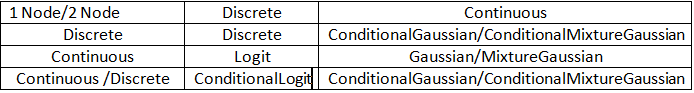

## Discrete Nodes

### Discrete (Parents: Discrete/None)

<p> Discrete Node Distribution contains from Probas Table. Where there are combinations of vals as index , if node has parents, otherwise it's just a probas for each option for random varibale. <p>

In [23]:
bn_d.distributions['personal_alcohol']

{'cprob': [0.98, 0.02], 'vals': ['0', '4']}

In [24]:
bn_d.distributions['relation']

{'cprob': {"['0', '0', '0']": [0.9767441860465116, 0.0, 0.023255813953488372],
  "['0', '0', '1']": [1.0, 0.0, 0.0],
  "['0', '0', '3']": [0.0, 0.0, 1.0],
  "['0', '4', '0']": [0.0, 1.0, 0.0],
  "['0', '4', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['0', '4', '3']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '0', '0']": [0.0, 0.0, 1.0],
  "['1', '0', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '0', '3']": [0.0, 0.0, 1.0],
  "['1', '4', '0']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '4', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '4', '3']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333]},
 'vals': ['0', '2', '4']}

### Logit (Parents: Continuous)

<p> Data from this type of node provides info about classificator inside. Mean_base - interceptions, mean_scal - coefficients, classes - names of classes. <p>

In [25]:
bn.distributions['Structural setting']

{'classes': ['BACKARC',
  'DELTA',
  'FORELAND',
  'INTRACRATONIC',
  'INVERSION',
  'PASSIVE MARGIN',
  'RIFT',
  'SALT',
  'SUB-SALT',
  'SUB-THRUST',
  'THRUST',
  'WRENCH'],
 'classifier_obj': "\x80\x04\x95ñ\x03\x00\x00\x00\x00\x00\x00\x8c\x1esklearn.linear_model._logistic\x94\x8c\x12LogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x07penalty\x94\x8c\x02l2\x94\x8c\x04dual\x94\x89\x8c\x03tol\x94G?\x1a6âë\x1cC-\x8c\x01C\x94G?ð\x00\x00\x00\x00\x00\x00\x8c\rfit_intercept\x94\x88\x8c\x11intercept_scaling\x94K\x01\x8c\x0cclass_weight\x94N\x8c\x0crandom_state\x94N\x8c\x06solver\x94\x8c\tnewton-cg\x94\x8c\x08max_iter\x94Kd\x8c\x0bmulti_class\x94\x8c\x0bmultinomial\x94\x8c\x07verbose\x94K\x00\x8c\nwarm_start\x94\x89\x8c\x06n_jobs\x94N\x8c\x08l1_ratio\x94N\x8c\x0en_features_in_\x94K\x01\x8c\x08classes_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x0c\x85\x94h\x1c\x8c\x05dtype\x94\x

### Conditional Logit (Parents: Continuous and Discrete)

<p>Data from this type provides info in the following format: <br> 
    condition (combination for discrete parents): {mean_base, mean_scal (info for continuous parents), classes}   <p>

In [ ]:
bn.distributions['Period']

## Continuous Nodes

### Guassian/Mixture Gaussian (Parents: Continuous/None)

Type Consists of info about model inside

In [ ]:
bn.distributions['Permeability']

### Conditional Gaussian/Conditional Mixture Gaussian

<p>Data from this type provides info in the following format: <br> 
    condition (combination for discrete parents): {mean_base, mean_scal (info for continuous parents), covars}   <p>

In [ ]:
bn.distributions['Porosity']